# Logistic Regression

## The data

我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。

In [1]:
#三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

Text(0,0.5,'Exam 2 Score')

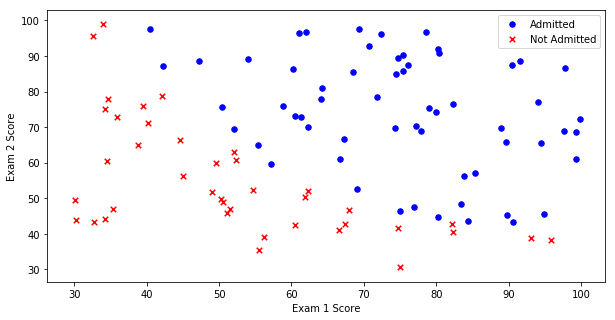

In [4]:
positive = pdData[pdData['Admitted'] == 1] # returns the subset of rows such Admitted = 1, i.e. the set of *positive* examples
negative = pdData[pdData['Admitted'] == 0] # returns the subset of rows such Admitted = 0, i.e. the set of *negative* examples

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## The logistic regression

目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

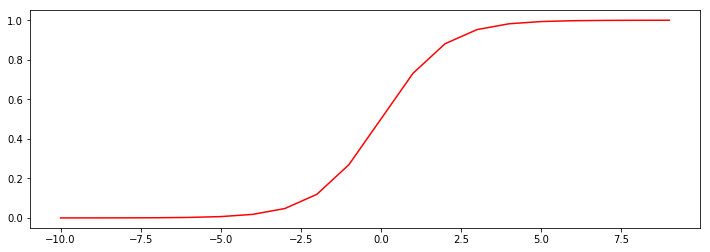

In [6]:
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')

### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

In [7]:
def model(X, theta):
    
    return sigmoid(np.dot(X, theta.T))

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [8]:

pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times


# set X (training data) and y (target variable)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
#X = np.matrix(X.values)
#y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
theta = np.zeros([1, 3])

C:\Software\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [10]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [11]:
theta

array([[0., 0., 0.]])

In [12]:
X.shape, y.shape, theta.shape

((100L, 3L), (100L, 1L), (1L, 3L))

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [13]:
### asdfasdf

In [14]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [15]:
cost(X, y, theta)

0.6931471805599453

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [16]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

In [19]:
gradient(X, y, theta)
         

array([[ -0.1       , -12.00921659, -11.26284221]])

### Gradient descent

比较3中不同梯度下降方法


In [20]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [21]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [26]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        print grad
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [23]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### 不同的停止策略

#### 设定迭代次数

[[ -0.1        -12.00921659 -11.26284221]]
[[ -0.09961643 -11.98293583 -11.23650421]]
[[ -0.09923373 -11.95671446 -11.21022588]]
[[ -0.09885189 -11.93055238 -11.18400713]]
[[ -0.09847092 -11.90444948 -11.15784786]]
[[ -0.09809081 -11.87840568 -11.13174797]]
[[ -0.09771156 -11.85242087 -11.10570736]]
[[ -0.09733318 -11.82649496 -11.07972592]]
[[ -0.09695565 -11.80062784 -11.05380357]]
[[ -0.09657898 -11.77481941 -11.02794019]]
[[ -0.09620317 -11.74906959 -11.00213569]]
[[ -0.09582821 -11.72337825 -10.97638997]]
[[ -0.09545411 -11.69774532 -10.95070293]]
[[ -0.09508085 -11.67217068 -10.92507446]]
[[ -0.09470845 -11.64665423 -10.89950447]]
[[ -0.0943369  -11.62119588 -10.87399285]]
[[ -0.09396619 -11.59579552 -10.8485395 ]]
[[ -0.09359633 -11.57045306 -10.82314432]]
[[ -0.09322731 -11.54516838 -10.7978072 ]]
[[ -0.09285914 -11.5199414  -10.77252805]]
[[ -0.0924918  -11.494772   -10.74730677]]
[[ -0.09212531 -11.46966009 -10.72214324]]
[[ -0.09175965 -11.44460556 -10.69703736]]
[[ -0.09139

[[ 5.04529801e-05 -5.15666493e+00 -4.40368817e+00]]
[[ 2.00928680e-04 -5.14636813e+00 -4.39340333e+00]]
[[ 3.51059203e-04 -5.13609498e+00 -4.38314223e+00]]
[[ 5.00845401e-04 -5.12584542e+00 -4.37290482e+00]]
[[ 6.50288127e-04 -5.11561940e+00 -4.36269104e+00]]
[[ 7.99388232e-04 -5.10541685e+00 -4.35250083e+00]]
[[ 9.48146563e-04 -5.09523771e+00 -4.34233414e+00]]
[[ 1.09656396e-03 -5.08508193e+00 -4.33219089e+00]]
[[ 1.24464128e-03 -5.07494945e+00 -4.32207104e+00]]
[[ 1.39237936e-03 -5.06484022e+00 -4.31197452e+00]]
[[ 1.53977903e-03 -5.05475416e+00 -4.30190129e+00]]
[[ 1.68684113e-03 -5.04469123e+00 -4.29185127e+00]]
[[ 1.83356650e-03 -5.03465138e+00 -4.28182442e+00]]
[[ 1.97995597e-03 -5.02463453e+00 -4.27182067e+00]]
[[ 2.12601037e-03 -5.01464063e+00 -4.26183997e+00]]
[[ 2.27173052e-03 -5.00466964e+00 -4.25188226e+00]]
[[ 2.41711727e-03 -4.99472148e+00 -4.24194748e+00]]
[[ 2.56217142e-03 -4.98479611e+00 -4.23203558e+00]]
[[ 2.70689381e-03 -4.97489346e+00 -4.22214650e+00]]
[[ 2.8512852

[[ 0.04043062 -2.39337353 -1.65132271]]
[[ 0.04049137 -2.38921188 -1.64719855]]
[[ 0.04055199 -2.38505907 -1.64308327]]
[[ 0.04061248 -2.38091509 -1.63897685]]
[[ 0.04067284 -2.3767799  -1.63487927]]
[[ 0.04073308 -2.37265349 -1.6307905 ]]
[[ 0.04079318 -2.36853584 -1.62671053]]
[[ 0.04085316 -2.36442693 -1.62263934]]
[[ 0.04091301 -2.36032674 -1.6185769 ]]
[[ 0.04097273 -2.35623524 -1.6145232 ]]
[[ 0.04103232 -2.35215243 -1.61047821]]
[[ 0.04109179 -2.34807827 -1.60644193]]
[[ 0.04115113 -2.34401276 -1.60241431]]
[[ 0.04121035 -2.33995586 -1.59839536]]
[[ 0.04126943 -2.33590757 -1.59438504]]
[[ 0.0413284  -2.33186785 -1.59038334]]
[[ 0.04138723 -2.3278367  -1.58639024]]
[[ 0.04144594 -2.32381408 -1.58240571]]
[[ 0.04150453 -2.31979999 -1.57842975]]
[[ 0.04156299 -2.3157944  -1.57446232]]
[[ 0.04162133 -2.3117973  -1.57050341]]
[[ 0.04167954 -2.30780865 -1.56655301]]
[[ 0.04173763 -2.30382846 -1.56261108]]
[[ 0.0417956  -2.29985668 -1.55867761]]
[[ 0.04185344 -2.29589332 -1.55475259]]


[[ 0.05628648 -1.30455431 -0.5787727 ]]
[[ 0.05631409 -1.3026503  -0.57691597]]
[[ 0.05634163 -1.30075013 -0.5750631 ]]
[[ 0.05636912 -1.2988538  -0.57321407]]
[[ 0.05639656 -1.29696129 -0.57136888]]
[[ 0.05642393 -1.29507259 -0.56952752]]
[[ 0.05645126 -1.2931877  -0.56768998]]
[[ 0.05647852 -1.2913066  -0.56585626]]
[[ 0.05650573 -1.2894293  -0.56402635]]
[[ 0.05653289 -1.28755578 -0.56220023]]
[[ 0.05655998 -1.28568603 -0.56037791]]
[[ 0.05658703 -1.28382006 -0.55855937]]
[[ 0.05661402 -1.28195783 -0.5567446 ]]
[[ 0.05664095 -1.28009936 -0.5549336 ]]
[[ 0.05666783 -1.27824464 -0.55312636]]
[[ 0.05669465 -1.27639364 -0.55132286]]
[[ 0.05672142 -1.27454637 -0.54952311]]
[[ 0.05674813 -1.27270283 -0.5477271 ]]
[[ 0.05677479 -1.27086299 -0.54593481]]
[[ 0.0568014  -1.26902685 -0.54414624]]
[[ 0.05682795 -1.26719441 -0.54236138]]
[[ 0.05685444 -1.26536566 -0.54058022]]
[[ 0.05688088 -1.26354058 -0.53880276]]
[[ 0.05690727 -1.26171918 -0.53702898]]
[[ 0.05693361 -1.25990144 -0.53525889]]


[[ 0.0636673  -0.79220469 -0.08553939]]
[[ 0.06367997 -0.79131552 -0.0847016 ]]
[[ 0.06369262 -0.79042808 -0.08386554]]
[[ 0.06370524 -0.78954235 -0.0830312 ]]
[[ 0.06371784 -0.78865834 -0.08219859]]
[[ 0.06373041 -0.78777604 -0.08136769]]
[[ 0.06374296 -0.78689545 -0.08053851]]
[[ 0.06375548 -0.78601657 -0.07971104]]
[[ 0.06376798 -0.78513938 -0.07888528]]
[[ 0.06378045 -0.78426389 -0.07806122]]
[[ 0.06379289 -0.7833901  -0.07723886]]
[[ 0.06380532 -0.782518   -0.0764182 ]]
[[ 0.06381771 -0.78164759 -0.07559923]]
[[ 0.06383009 -0.78077886 -0.07478195]]
[[ 0.06384243 -0.77991181 -0.07396636]]
[[ 0.06385476 -0.77904644 -0.07315245]]
[[ 0.06386705 -0.77818274 -0.07234022]]
[[ 0.06387933 -0.77732071 -0.07152967]]
[[ 0.06389158 -0.77646035 -0.07072079]]
[[ 0.0639038  -0.77560166 -0.06991358]]
[[ 0.063916   -0.77474462 -0.06910803]]
[[ 0.06392818 -0.77388924 -0.06830415]]
[[ 0.06394033 -0.77303551 -0.06750193]]
[[ 0.06395245 -0.77218344 -0.06670136]]
[[ 0.06396456 -0.77133301 -0.06590245]]


[[ 0.06702871 -0.55321954  0.13378583]]
[[ 0.06703469 -0.55278505  0.13416772]]
[[ 0.06704066 -0.55235136  0.13454879]]
[[ 0.06704662 -0.55191848  0.13492907]]
[[ 0.06705256 -0.55148641  0.13530854]]
[[ 0.0670585  -0.55105513  0.1356872 ]]
[[ 0.06706442 -0.55062466  0.13606507]]
[[ 0.06707033 -0.55019498  0.13644214]]
[[ 0.06707623 -0.5497661   0.13681841]]
[[ 0.06708212 -0.54933801  0.13719388]]
[[ 0.06708799 -0.54891072  0.13756856]]
[[ 0.06709386 -0.54848421  0.13794245]]
[[ 0.06709971 -0.5480585   0.13831555]]
[[ 0.06710555 -0.54763358  0.13868786]]
[[ 0.06711138 -0.54720944  0.13905938]]
[[ 0.0671172  -0.54678609  0.13943011]]
[[ 0.06712301 -0.54636352  0.13980006]]
[[ 0.0671288  -0.54594173  0.14016923]]
[[ 0.06713458 -0.54552072  0.14053762]]
[[ 0.06714036 -0.5451005   0.14090522]]
[[ 0.06714612 -0.54468105  0.14127205]]
[[ 0.06715186 -0.54426237  0.1416381 ]]
[[ 0.0671576  -0.54384447  0.14200338]]
[[ 0.06716333 -0.54342735  0.14236788]]
[[ 0.06716904 -0.54301099  0.14273161]]


[[ 0.06861874 -0.43464663  0.23252667]]
[[ 0.06862158 -0.43442627  0.23269459]]
[[ 0.06862441 -0.43420629  0.23286212]]
[[ 0.06862723 -0.43398669  0.23302928]]
[[ 0.06863005 -0.43376747  0.23319605]]
[[ 0.06863286 -0.43354863  0.23336245]]
[[ 0.06863567 -0.43333018  0.23352847]]
[[ 0.06863847 -0.4331121   0.23369412]]
[[ 0.06864126 -0.43289439  0.23385938]]
[[ 0.06864405 -0.43267707  0.23402428]]
[[ 0.06864684 -0.43246012  0.23418879]]
[[ 0.06864962 -0.43224354  0.23435294]]
[[ 0.06865239 -0.43202734  0.23451671]]
[[ 0.06865516 -0.43181152  0.23468011]]
[[ 0.06865792 -0.43159607  0.23484313]]
[[ 0.06866068 -0.43138099  0.23500579]]
[[ 0.06866343 -0.43116628  0.23516807]]
[[ 0.06866617 -0.43095194  0.23532999]]
[[ 0.06866891 -0.43073798  0.23549154]]
[[ 0.06867165 -0.43052438  0.23565272]]
[[ 0.06867438 -0.43031115  0.23581353]]
[[ 0.0686771  -0.43009829  0.23597397]]
[[ 0.06867982 -0.4298858   0.23613405]]
[[ 0.06868253 -0.42967367  0.23629377]]
[[ 0.06868524 -0.42946192  0.23645312]]


[[ 0.06937337 -0.37296266  0.2745317 ]]
[[ 0.06937471 -0.37284445  0.27459832]]
[[ 0.06937605 -0.37272642  0.27466475]]
[[ 0.06937738 -0.37260858  0.27473101]]
[[ 0.06937871 -0.37249091  0.27479709]]
[[ 0.06938004 -0.37237343  0.27486299]]
[[ 0.06938136 -0.37225613  0.27492871]]
[[ 0.06938269 -0.37213901  0.27499425]]
[[ 0.06938401 -0.37202207  0.27505961]]
[[ 0.06938532 -0.37190531  0.2751248 ]]
[[ 0.06938664 -0.37178873  0.27518981]]
[[ 0.06938795 -0.37167233  0.27525465]]
[[ 0.06938926 -0.37155611  0.27531931]]
[[ 0.06939057 -0.37144006  0.27538379]]
[[ 0.06939187 -0.3713242   0.2754481 ]]
[[ 0.06939317 -0.37120851  0.27551223]]
[[ 0.06939447 -0.371093    0.27557619]]
[[ 0.06939577 -0.37097767  0.27563997]]
[[ 0.06939706 -0.37086251  0.27570358]]
[[ 0.06939835 -0.37074754  0.27576701]]
[[ 0.06939964 -0.37063273  0.27583027]]
[[ 0.06940093 -0.37051811  0.27589336]]
[[ 0.06940221 -0.37040366  0.27595628]]
[[ 0.06940349 -0.37028938  0.27601902]]
[[ 0.06940477 -0.37017528  0.27608159]]


[[ 0.06973316 -0.33814353  0.28971185]]
[[ 0.06973378 -0.33807489  0.28973009]]
[[ 0.0697344  -0.33800635  0.28974825]]
[[ 0.06973501 -0.33793789  0.28976633]]
[[ 0.06973563 -0.33786952  0.28978433]]
[[ 0.06973624 -0.33780124  0.28980224]]
[[ 0.06973685 -0.33773304  0.28982007]]
[[ 0.06973746 -0.33766492  0.28983782]]
[[ 0.06973807 -0.3375969   0.28985549]]
[[ 0.06973868 -0.33752896  0.28987307]]
[[ 0.06973929 -0.3374611   0.28989057]]
[[ 0.0697399  -0.33739333  0.28990799]]
[[ 0.0697405  -0.33732564  0.28992533]]
[[ 0.06974111 -0.33725804  0.28994258]]
[[ 0.06974171 -0.33719053  0.28995976]]
[[ 0.06974231 -0.3371231   0.28997685]]
[[ 0.06974291 -0.33705575  0.28999386]]
[[ 0.06974351 -0.33698849  0.29001079]]
[[ 0.06974411 -0.33692131  0.29002765]]
[[ 0.0697447  -0.33685421  0.29004442]]
[[ 0.0697453  -0.3367872   0.29006111]]
[[ 0.06974589 -0.33672028  0.29007771]]
[[ 0.06974648 -0.33665343  0.29009424]]
[[ 0.06974708 -0.33658667  0.29011069]]
[[ 0.06974767 -0.33652     0.29012706]]


[[ 0.06989827 -0.31682121  0.29189415]]
[[ 0.06989855 -0.31677628  0.29189006]]
[[ 0.06989883 -0.31673139  0.29188593]]
[[ 0.06989911 -0.31668654  0.29188176]]
[[ 0.06989939 -0.31664173  0.29187756]]
[[ 0.06989967 -0.31659697  0.29187331]]
[[ 0.06989994 -0.31655224  0.29186903]]
[[ 0.06990022 -0.31650756  0.29186471]]
[[ 0.0699005  -0.31646292  0.29186035]]
[[ 0.06990077 -0.31641832  0.29185596]]
[[ 0.06990105 -0.31637376  0.29185152]]
[[ 0.06990132 -0.31632924  0.29184705]]
[[ 0.0699016  -0.31628477  0.29184254]]
[[ 0.06990187 -0.31624033  0.291838  ]]
[[ 0.06990214 -0.31619594  0.29183342]]
[[ 0.06990242 -0.31615158  0.2918288 ]]
[[ 0.06990269 -0.31610727  0.29182414]]
[[ 0.06990296 -0.316063    0.29181945]]
[[ 0.06990323 -0.31601877  0.29181471]]
[[ 0.0699035  -0.31597457  0.29180995]]
[[ 0.06990377 -0.31593042  0.29180514]]
[[ 0.06990404 -0.31588631  0.2918003 ]]
[[ 0.06990431 -0.31584224  0.29179542]]
[[ 0.06990458 -0.31579821  0.29179051]]
[[ 0.06990484 -0.31575422  0.29178556]]


[[ 0.06997183 -0.30202936  0.28812994]]
[[ 0.06997195 -0.30199594  0.28811575]]
[[ 0.06997207 -0.30196254  0.28810153]]
[[ 0.0699722  -0.30192916  0.2880873 ]]
[[ 0.06997232 -0.30189581  0.28807306]]
[[ 0.06997244 -0.30186247  0.2880588 ]]
[[ 0.06997256 -0.30182915  0.28804452]]
[[ 0.06997268 -0.30179586  0.28803022]]
[[ 0.0699728  -0.30176258  0.28801591]]
[[ 0.06997292 -0.30172933  0.28800158]]
[[ 0.06997304 -0.30169609  0.28798723]]
[[ 0.06997316 -0.30166288  0.28797286]]
[[ 0.06997328 -0.30162969  0.28795848]]
[[ 0.0699734  -0.30159651  0.28794409]]
[[ 0.06997351 -0.30156336  0.28792967]]
[[ 0.06997363 -0.30153023  0.28791524]]
[[ 0.06997375 -0.30149712  0.2879008 ]]
[[ 0.06997387 -0.30146402  0.28788633]]
[[ 0.06997398 -0.30143095  0.28787186]]
[[ 0.0699741  -0.3013979   0.28785736]]
[[ 0.06997422 -0.30136487  0.28784285]]
[[ 0.06997434 -0.30133186  0.28782832]]
[[ 0.06997445 -0.30129886  0.28781377]]
[[ 0.06997457 -0.30126589  0.28779921]]
[[ 0.06997468 -0.30123294  0.28778464]]


[[ 0.07000406 -0.28957773  0.28113846]]
[[ 0.0700041  -0.28955044  0.28111966]]
[[ 0.07000415 -0.28952315  0.28110086]]
[[ 0.07000419 -0.28949588  0.28108206]]
[[ 0.07000423 -0.28946861  0.28106325]]
[[ 0.07000428 -0.28944136  0.28104443]]
[[ 0.07000432 -0.28941412  0.28102561]]
[[ 0.07000436 -0.28938688  0.28100677]]
[[ 0.07000441 -0.28935966  0.28098794]]
[[ 0.07000445 -0.28933245  0.28096909]]
[[ 0.07000449 -0.28930525  0.28095024]]
[[ 0.07000453 -0.28927805  0.28093139]]
[[ 0.07000458 -0.28925087  0.28091252]]
[[ 0.07000462 -0.2892237   0.28089365]]
[[ 0.07000466 -0.28919653  0.28087478]]
[[ 0.0700047  -0.28916938  0.2808559 ]]
[[ 0.07000474 -0.28914224  0.28083701]]
[[ 0.07000479 -0.2891151   0.28081811]]
[[ 0.07000483 -0.28908798  0.28079921]]
[[ 0.07000487 -0.28906087  0.28078031]]
[[ 0.07000491 -0.28903377  0.28076139]]
[[ 0.07000495 -0.28900667  0.28074247]]
[[ 0.07000499 -0.28897959  0.28072355]]
[[ 0.07000503 -0.28895251  0.28070461]]
[[ 0.07000507 -0.28892545  0.28068568]]


[[ 0.07001379 -0.2797167   0.27356997]]
[[ 0.0700138  -0.27969236  0.27354962]]
[[ 0.07001381 -0.27966802  0.27352927]]
[[ 0.07001382 -0.27964369  0.27350891]]
[[ 0.07001384 -0.27961937  0.27348855]]
[[ 0.07001385 -0.27959505  0.27346819]]
[[ 0.07001386 -0.27957074  0.27344783]]
[[ 0.07001387 -0.27954643  0.27342746]]
[[ 0.07001388 -0.27952213  0.27340709]]
[[ 0.07001389 -0.27949783  0.27338672]]
[[ 0.0700139  -0.27947354  0.27336635]]
[[ 0.07001391 -0.27944926  0.27334598]]
[[ 0.07001392 -0.27942498  0.2733256 ]]
[[ 0.07001393 -0.27940071  0.27330523]]
[[ 0.07001394 -0.27937644  0.27328485]]
[[ 0.07001395 -0.27935218  0.27326446]]
[[ 0.07001396 -0.27932792  0.27324408]]
[[ 0.07001397 -0.27930367  0.2732237 ]]
[[ 0.07001398 -0.27927943  0.27320331]]
[[ 0.07001399 -0.27925519  0.27318292]]
[[ 0.070014   -0.27923095  0.27316253]]
[[ 0.07001401 -0.27920673  0.27314213]]
[[ 0.07001402 -0.2791825   0.27312174]]
[[ 0.07001403 -0.27915829  0.27310134]]
[[ 0.07001404 -0.27913407  0.27308094]]


array([[-0.00027127,  0.00705232,  0.00376711]])

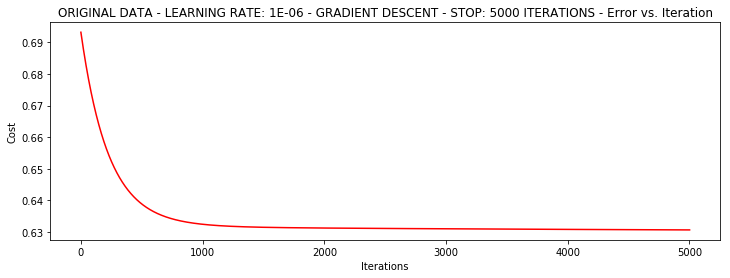

In [27]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

#### 根据损失值停止

设定阈值 1E-6, 差不多需要110 000次迭代 

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 13.23s


array([[-5.13364014,  0.04771429,  0.04072397]])

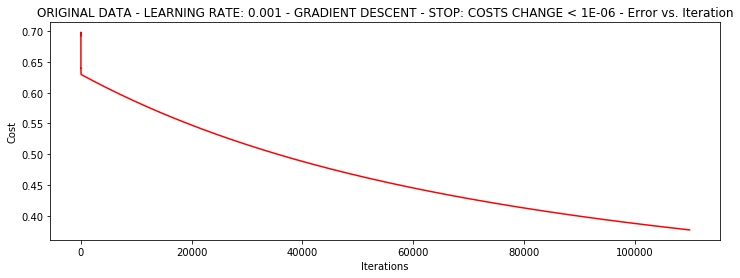

In [25]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

#### 根据梯度变化停止

设定阈值 0.05,差不多需要40 000次迭代

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 10.79s


array([[-2.37033409,  0.02721692,  0.01899456]])

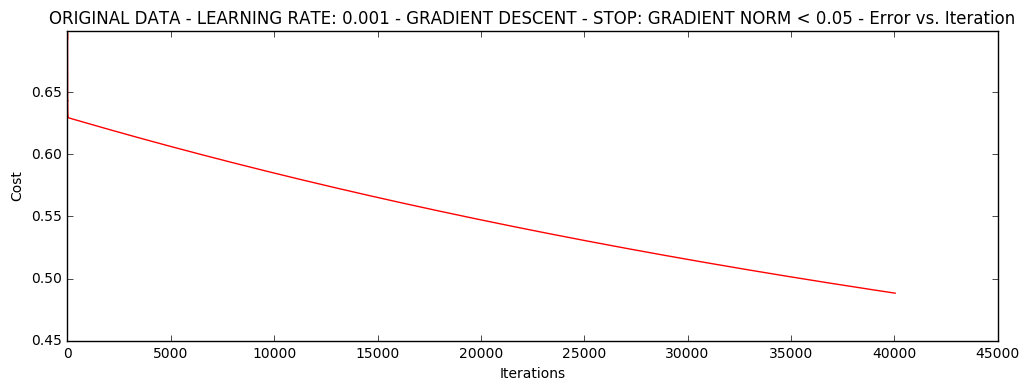

In [28]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

### 对比不同的梯度下降方法

#### Stochastic descent

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38504802  0.09357723 -0.01034717]] - Iter: 5000 - Last cost: 1.59 - Duration: 0.42s


array([[-0.38504802,  0.09357723, -0.01034717]])

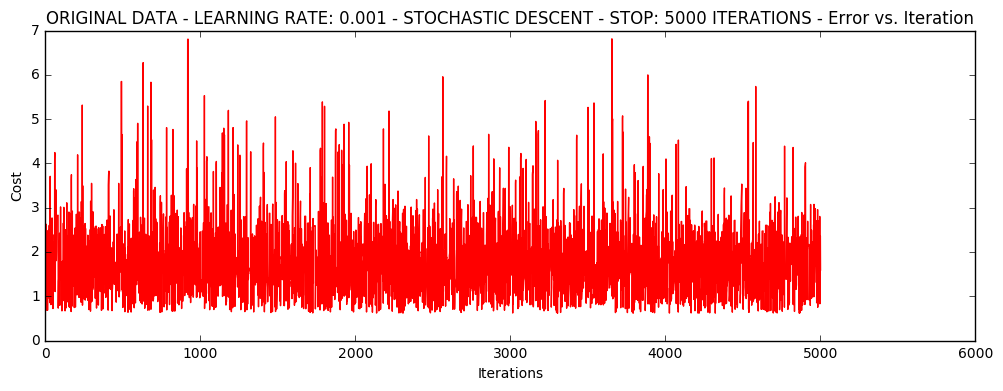

In [30]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

有点爆炸。。。很不稳定,再来试试把学习率调小一些

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202012  0.01009114  0.00103943]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.10s


array([[-0.00202012,  0.01009114,  0.00103943]])

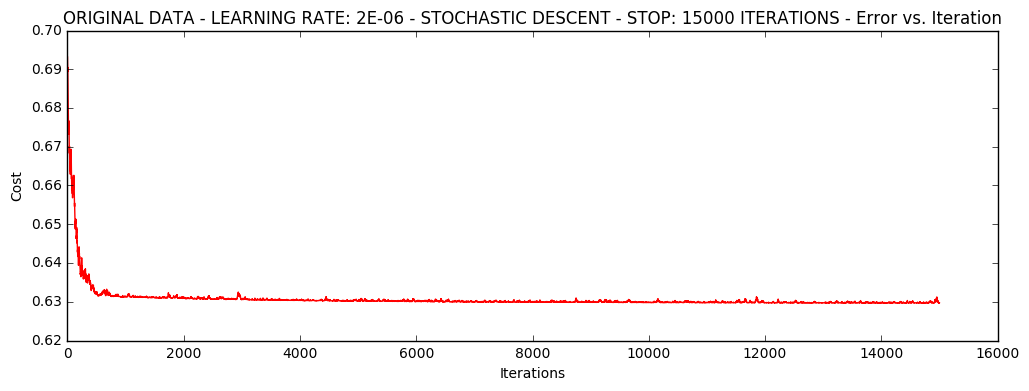

In [31]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

速度快，但稳定性差，需要很小的学习率

#### Mini-batch descent

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.0352224   0.01668297  0.0124234 ]] - Iter: 15000 - Last cost: 0.57 - Duration: 1.44s


array([[-1.0352224 ,  0.01668297,  0.0124234 ]])

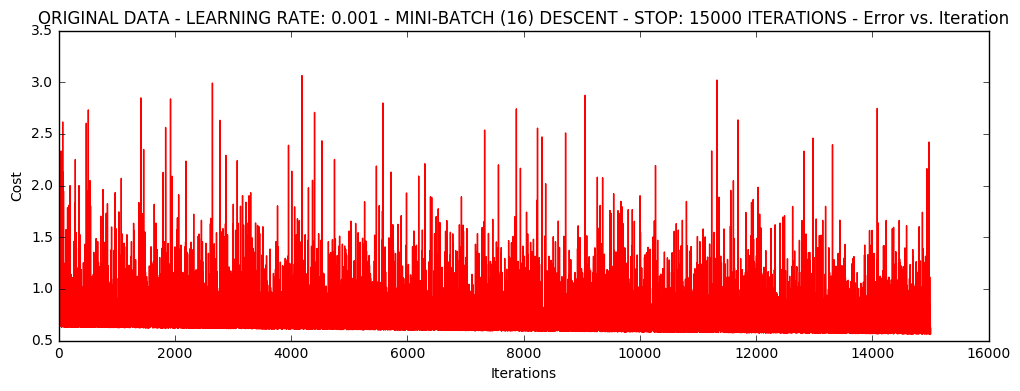

In [33]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

浮动仍然比较大，我们来尝试下对数据进行标准化
将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[ 0.3080807   0.86494967  0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.13s


array([[ 0.3080807 ,  0.86494967,  0.77367651]])

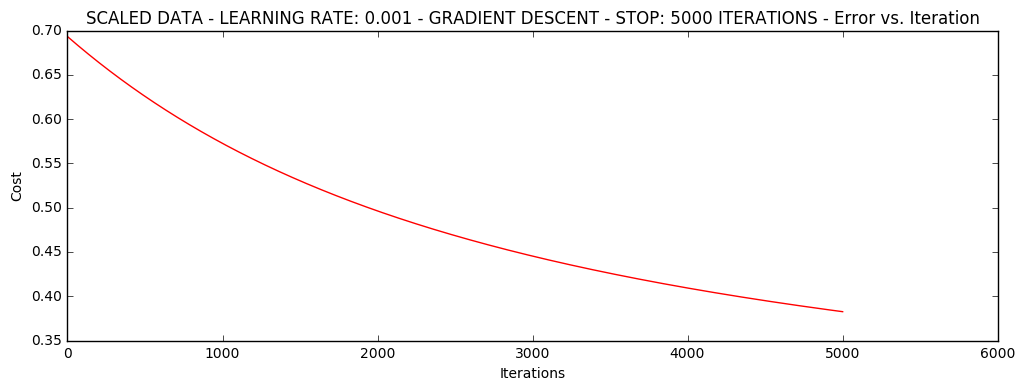

In [34]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

它好多了！原始数据，只能达到达到0.61，而我们得到了0.38个在这里！
所以对数据做预处理是非常重要的

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[ 1.071  2.63   2.411]] - Iter: 59422 - Last cost: 0.22 - Duration: 12.00s


array([[ 1.071,  2.63 ,  2.411]])

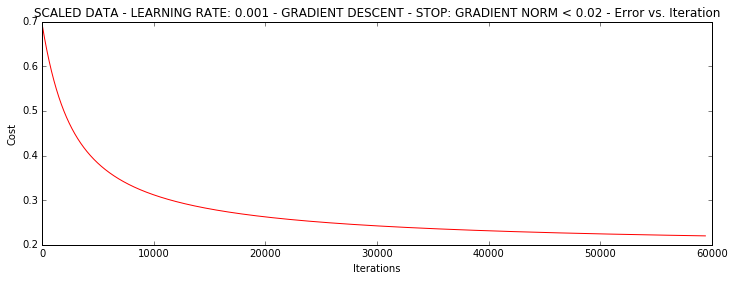

In [25]:
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

更多的迭代次数会使得损失下降的更多！

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[ 1.14848169  2.79268789  2.5667383 ]] - Iter: 72637 - Last cost: 0.22 - Duration: 7.05s


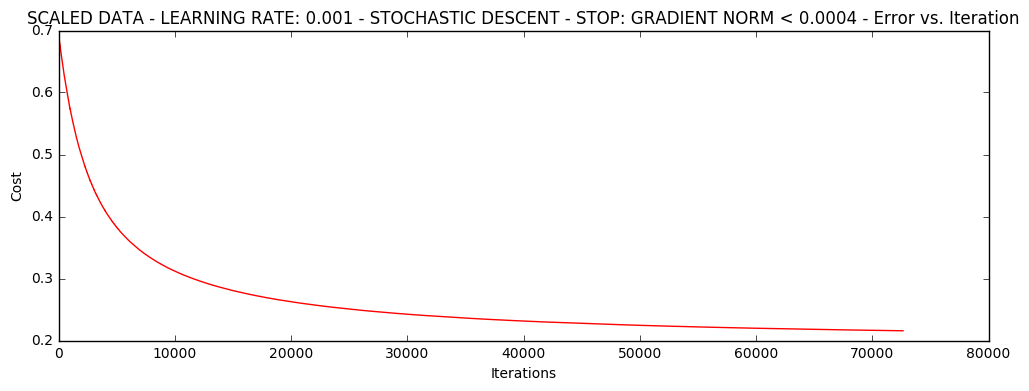

In [35]:
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

随机梯度下降更快，但是我们需要迭代的次数也需要更多，所以还是用batch的比较合适！！！

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[ 1.17096801  2.83171736  2.61095087]] - Iter: 3940 - Last cost: 0.21 - Duration: 0.50s


array([[ 1.17096801,  2.83171736,  2.61095087]])

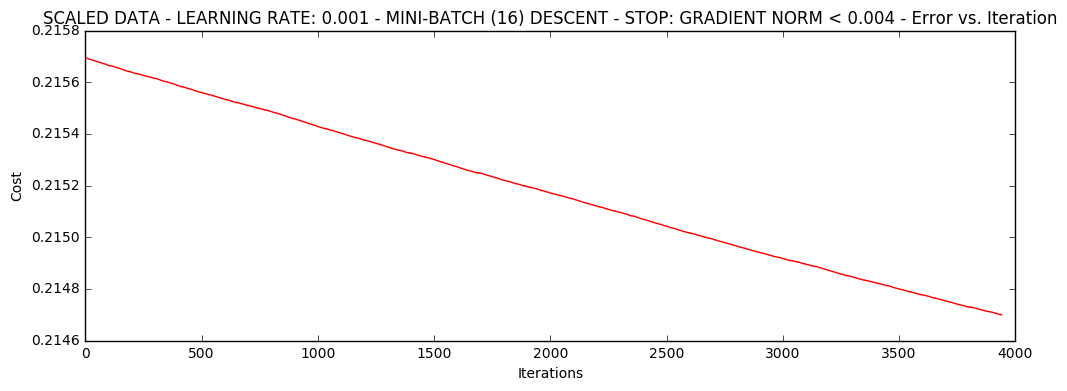

In [36]:
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

## 精度

In [38]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [40]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
